In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from prophet import Prophet
from prophet.plot import plot_seasonality

from warnings import filterwarnings
filterwarnings('ignore')

c:\Users\John Rey Faciolan\Desktop\Work and Study\Software Projects\2025\NDVI-LST-Analysis\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_excel("datasets/GROUP-14-VALUES_NDVI_LST.xlsx", sheet_name="DATASET", index_col="DATE")
df.fillna(method="ffill", inplace=True);

# Calculate the mean and standard deviation for LST and NDVI columns
mean_lst = df['LST'].mean()
std_lst = df['LST'].std()
mean_ndvi = df['NDVI'].mean()
std_ndvi = df['NDVI'].std()

# Define the upper and lower bounds for LST and NDVI
upper_bound_lst = mean_lst + 1.96 * std_lst
lower_bound_lst = mean_lst - 1.96 * std_lst
upper_bound_ndvi = mean_ndvi + 1.96 * std_ndvi
lower_bound_ndvi = mean_ndvi - 1.96 * std_ndvi

# Drop the outliers
df = df[(df['LST'] >= lower_bound_lst) & (df['LST'] <= upper_bound_lst)]
df = df[(df['NDVI'] >= lower_bound_ndvi) & (df['NDVI'] <= upper_bound_ndvi)]

df.index = pd.to_datetime(df.index)

## Facebook Prophet Model

The general idea of the model is similar to a generalized additive model. The “Prophet Equation” fits, as mentioned above, trends, seasonality, and holidays. This is given by,

$$
y(t) = g(t) + s(t) + h(t) + e(t)
$$

where:

- \( g(t) \) refers to **trend** (changes over a long period of time).  
- \( s(t) \) refers to **seasonality** (periodic or short-term changes).  
- \( h(t) \) refers to **effects of holidays** on the forecast.  
- \( e(t) \) refers to **unconditional changes** specific to a business, person, or circumstance. It is also called the **error term**.  
- \( y(t) \) is the **forecast**.


## Forecasting NDVI Using Facebook Prophet

In [3]:
# Prophet Model Forecasting
prophet_df = df["NDVI"].reset_index()
prophet_df.columns = ['ds', 'y']
model = Prophet()
model.fit(prophet_df)
future = model.make_future_dataframe(periods=12, freq='ME')
forecast = model.predict(future)

16:20:18 - cmdstanpy - INFO - Chain [1] start processing
16:20:18 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,0.871787,0.754501,1.032150,0.871787,0.871787,0.031168,0.031168,0.031168,0.031168,0.031168,0.031168,0.0,0.0,0.0,0.902954
1,2015-02-01,0.870754,0.740103,1.016813,0.870754,0.870754,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,0.0,0.0,0.0,0.878855
2,2015-04-01,0.868788,0.669759,0.953699,0.868788,0.868788,-0.054960,-0.054960,-0.054960,-0.054960,-0.054960,-0.054960,0.0,0.0,0.0,0.813827
3,2015-05-01,0.867788,0.695246,0.972969,0.867788,0.867788,-0.027897,-0.027897,-0.027897,-0.027897,-0.027897,-0.027897,0.0,0.0,0.0,0.839891
4,2015-06-01,0.866755,0.691014,0.962428,0.866755,0.866755,-0.044428,-0.044428,-0.044428,-0.044428,-0.044428,-0.044428,0.0,0.0,0.0,0.822327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2024-07-31,0.756093,0.568871,0.841718,0.756085,0.756099,-0.041530,-0.041530,-0.041530,-0.041530,-0.041530,-0.041530,0.0,0.0,0.0,0.714563
107,2024-08-31,0.755079,0.592956,0.864592,0.755070,0.755087,-0.027089,-0.027089,-0.027089,-0.027089,-0.027089,-0.027089,0.0,0.0,0.0,0.727990
108,2024-09-30,0.754098,0.599795,0.853497,0.754087,0.754107,-0.025379,-0.025379,-0.025379,-0.025379,-0.025379,-0.025379,0.0,0.0,0.0,0.728719
109,2024-10-31,0.753084,0.586537,0.871496,0.753072,0.753095,-0.024719,-0.024719,-0.024719,-0.024719,-0.024719,-0.024719,0.0,0.0,0.0,0.728365


In [9]:
future

,ds
0,2015-01-01
1,2015-02-01
2,2015-04-01
3,2015-05-01
4,2015-06-01
...,...
106,2024-07-31
107,2024-08-31
108,2024-09-30
109,2024-10-31


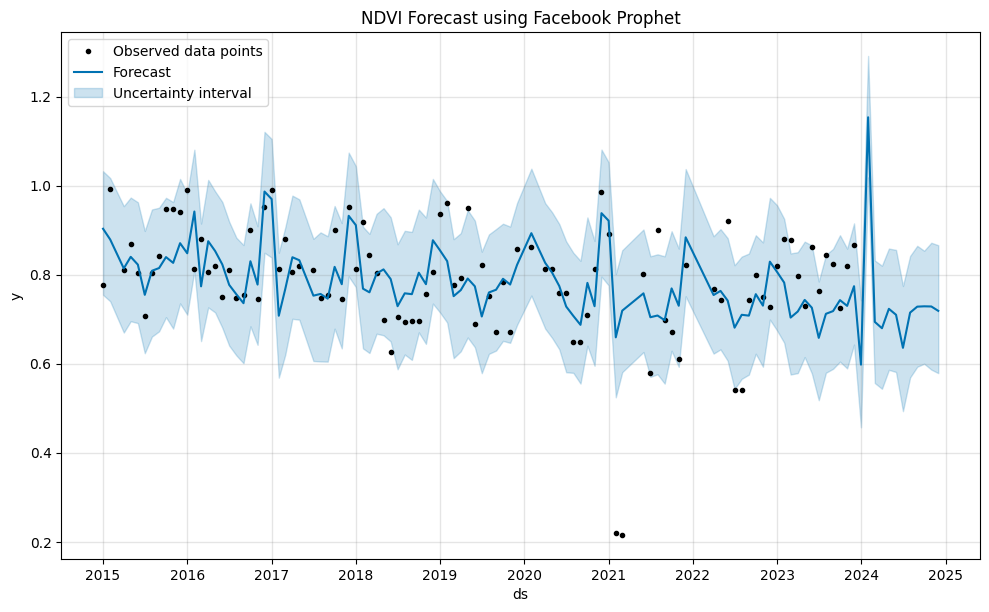

In [5]:
# Plot Prophet forecast
fig = model.plot(forecast, include_legend=True)
plt.title("NDVI Forecast using Facebook Prophet")
plt.show()

## Forecasting LST Using Facebook Prophet

In [6]:
# Prophet Model Forecasting
prophet_df = df["LST"].reset_index()
prophet_df.columns = ['ds', 'y']
prophet_df.Name = "LST"
model = Prophet()
model.fit(prophet_df)
future = model.make_future_dataframe(periods=12, freq='ME')
forecast = model.predict(future)

16:20:19 - cmdstanpy - INFO - Chain [1] start processing
16:20:19 - cmdstanpy - INFO - Chain [1] done processing


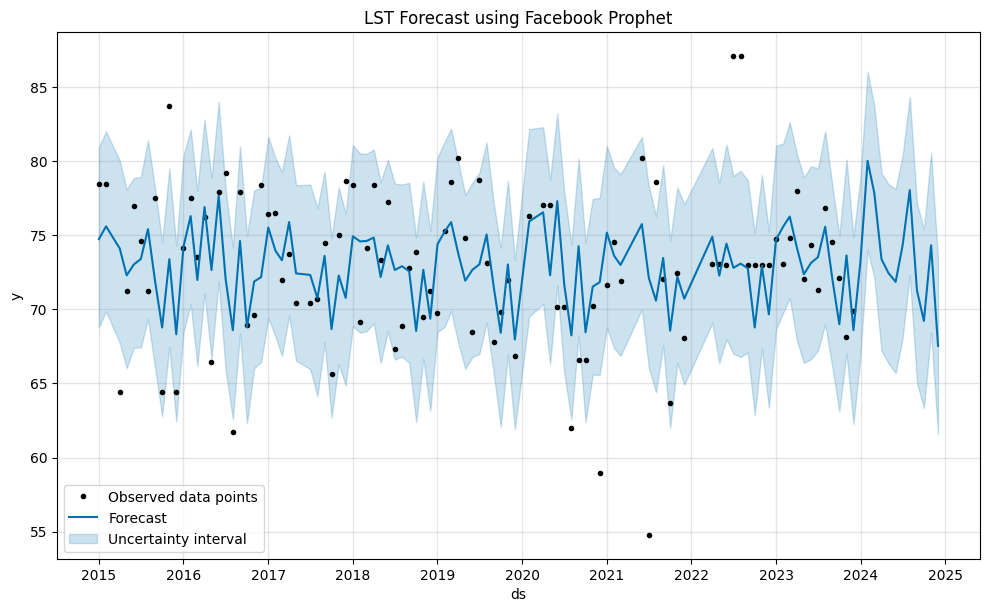

In [7]:
# Plot Prophet forecast
fig = model.plot(forecast, include_legend=True)
plt.title("LST Forecast using Facebook Prophet")
plt.show()

In [8]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,72.983155,68.783780,80.939155,72.983155,72.983155,1.756142,1.756142,1.756142,1.756142,1.756142,1.756142,0.0,0.0,0.0,74.739297
1,2015-02-01,72.975560,69.860192,81.997645,72.975560,72.975560,2.626450,2.626450,2.626450,2.626450,2.626450,2.626450,0.0,0.0,0.0,75.602010
2,2015-04-01,72.961106,67.736818,80.044688,72.961106,72.961106,1.151011,1.151011,1.151011,1.151011,1.151011,1.151011,0.0,0.0,0.0,74.112117
3,2015-05-01,72.953756,66.029844,78.094667,72.953756,72.953756,-0.660910,-0.660910,-0.660910,-0.660910,-0.660910,-0.660910,0.0,0.0,0.0,72.292846
4,2015-06-01,72.946161,67.413625,78.869979,72.946161,72.946161,0.083794,0.083794,0.083794,0.083794,0.083794,0.083794,0.0,0.0,0.0,73.029955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2024-07-31,73.347736,72.324093,84.336901,73.335083,73.357748,4.699485,4.699485,4.699485,4.699485,4.699485,4.699485,0.0,0.0,0.0,78.047221
107,2024-08-31,73.369384,65.054011,77.148713,73.354021,73.381406,-2.088998,-2.088998,-2.088998,-2.088998,-2.088998,-2.088998,0.0,0.0,0.0,71.280386
108,2024-09-30,73.390334,63.332244,75.417417,73.372313,73.404509,-4.171790,-4.171790,-4.171790,-4.171790,-4.171790,-4.171790,0.0,0.0,0.0,69.218544
109,2024-10-31,73.411982,68.454076,80.576194,73.391240,73.428839,0.914719,0.914719,0.914719,0.914719,0.914719,0.914719,0.0,0.0,0.0,74.326701


In [10]:
future

,ds
0,2015-01-01
1,2015-02-01
2,2015-04-01
3,2015-05-01
4,2015-06-01
...,...
106,2024-07-31
107,2024-08-31
108,2024-09-30
109,2024-10-31
